In [7]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [8]:
python3 --version
pip3 --version
virtualenv --version


NameError: name 'python3' is not defined

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%202%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [57]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [58]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [59]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[-0.00327896],
       [-0.06947894],
       [ 0.08764824],
       [ 0.01253964],
       [-0.02905891],
       [-0.03757031],
       [ 0.04686241],
       [ 0.00544161],
       [-0.03796679],
       [ 0.09919322],
       [-0.08025569],
       [ 0.07656656],
       [-0.10004212],
       [-0.00898678],
       [ 0.1265938 ],
       [-0.00626002],
       [ 0.00883425],
       [ 0.24268585],
       [ 0.27385974],
       [ 0.41210413]], dtype=float32), array([0.01325507], dtype=float32)]


In [119]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

KeyError: None

In [6]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.0860004

In [94]:
#tablacomb=pd.concat([tabla,tabla2], axis=0)
#tablacomb=tablacomb.reset_index(drop=True)
#pd.set_option('display.max_rows', 8000)
#Descomprimir archivos formato .gz
import os
import gzip
import shutil
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set()
from matplotlib import pyplot as plt
import datetime
import time


data_file='/home/gfajardo/Desktop/Datos 121001/PSNfdiciembre2016.csv'
column_names=['Lat','Long','Alt','Dia','Seg']
Mli = pd.read_csv(data_file)#names=column_names)#, header=True)
Mli = Mli.drop(Mli.columns[[0]], axis=1)


Doy=363
Mli_filter = Mli[Mli['Dia'] > Doy]
#Mli_filter =Mli_filter.sort_values(by=['Seg'], ascending=True)#Ordenar en función al tiempo en segundos#print(Mlif)

#Mli_filter2 = Mli_filter[Mli_filter['Alt']>3000]
#Mli_filter=Mli_filter2
print(Mli_filter.describe())
print(Mli_filter.dtypes)
print(Mli_filter.Lat.values.size)
print(Mli)

                Lat          Long           Alt      Dia           Seg
count  79141.000000  79141.000000  79141.000000  79141.0  79141.000000
mean     -12.042412    -75.321410   3325.446321    364.0  39570.007240
std        0.000004      0.000006      2.038153      0.0  22846.183541
min      -12.042428    -75.321427   3319.360000    364.0      0.000000
25%      -12.042415    -75.321414   3324.127000    364.0  19785.000000
50%      -12.042412    -75.321410   3325.385000    364.0  39570.000000
75%      -12.042409    -75.321407   3326.598000    364.0  59355.000000
max      -12.042401    -75.321389   3331.684000    364.0  79141.000000
Lat     float64
Long    float64
Alt     float64
Dia       int64
Seg       int64
dtype: object
79141
               Lat       Long       Alt  Dia    Seg
0       -12.042409 -75.321409  3325.415  355  28736
1       -12.042409 -75.321408  3325.390  355  28737
2       -12.042409 -75.321408  3325.379  355  28738
3       -12.042409 -75.321408  3325.400  355  28739
4

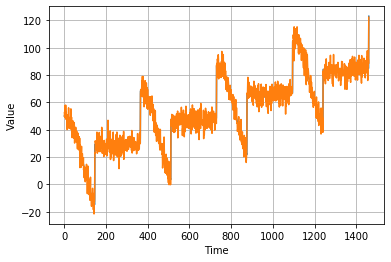

In [22]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time,series)
# Update with noise
series += noise(time, noise_level, seed=42)
plot_series(time,series)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

20700
4140
4140
4140
4140
4140
4140
260713
              Lat       Long       Alt  Dia    Seg
260703 -12.042410 -75.321404  3324.884  364  75001
260704 -12.042410 -75.321404  3324.840  364  75002
260705 -12.042410 -75.321404  3324.856  364  75003
260706 -12.042410 -75.321404  3324.821  364  75004
260707 -12.042410 -75.321404  3324.811  364  75005
260708 -12.042410 -75.321403  3324.868  364  75006
260709 -12.042410 -75.321403  3324.779  364  75007
260710 -12.042410 -75.321403  3324.818  364  75008
260711 -12.042411 -75.321403  3324.777  364  75009
260712 -12.042410 -75.321403  3324.778  364  75010
260713 -12.042411 -75.321403  3324.765  364  75011
260714 -12.042410 -75.321403  3324.770  364  75012
260715 -12.042411 -75.321403  3324.760  364  75013
260716 -12.042410 -75.321403  3324.733  364  75014
260717 -12.042410 -75.321403  3324.734  364  75015
260718 -12.042411 -75.321403  3324.708  364  75016
260719 -12.042410 -75.321403  3324.728  364  75017
260720 -12.042410 -75.321403  3324.742 

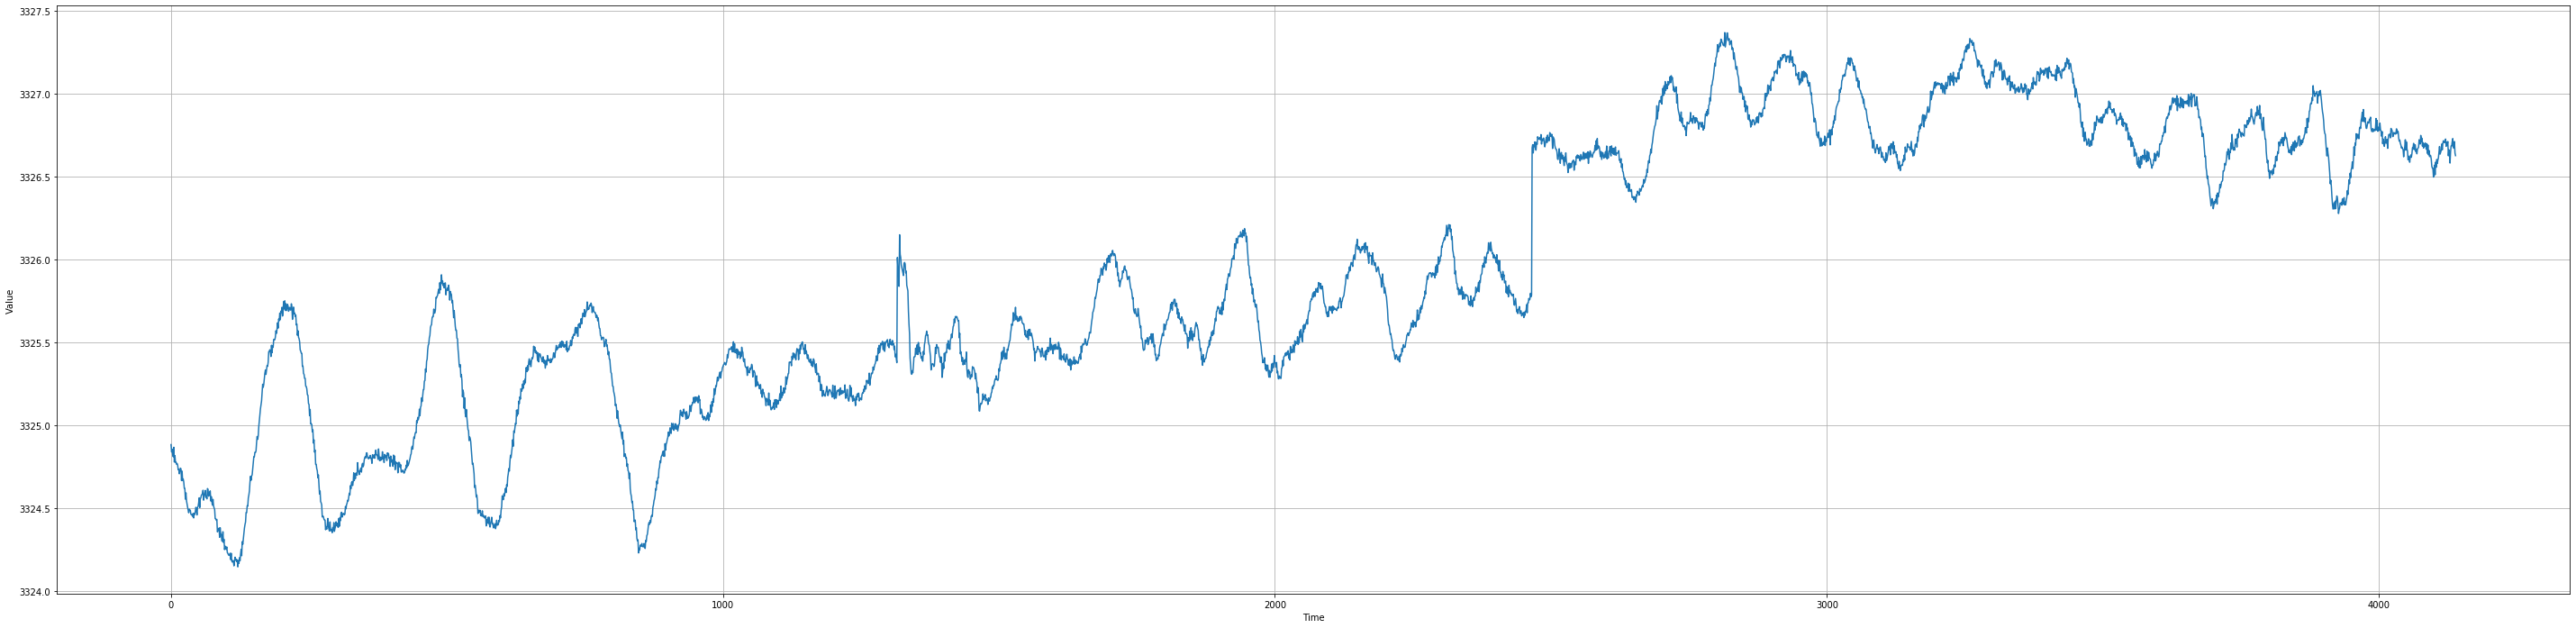

In [96]:
Mli_filter = Mli_filter[Mli_filter['Alt'] > 100] 
Mli_filter = Mli_filter[Mli_filter['Seg'] > 75000] 
#time=Mli_filter.Seg.values
time=Mli_filter.index
Mli_filter_time = Mli_filter.sort_values(['Dia', 'Seg'], ascending = (True, True))
print(Mli_filter.size)#valuesxcolumnas
print(Mli_filter.Alt.values.size)
print(Mli_filter.Alt.size)
print(Mli_filter.Seg.values.size)
print(Mli_filter.Seg.size)
print(Mli_filter.Dia.values.size)
print(Mli_filter.Dia.size)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also 
print(time[10])
print(Mli_filter_time)
time=Mli_filter_time.Seg
time = np.arange(Mli_filter_time.Seg.values.size, dtype="float32")
#print(Mli_filter.shape())
series=Mli_filter_time.Alt
series.size
plt.figure(figsize=(50, 12))
plot_series(time,series)

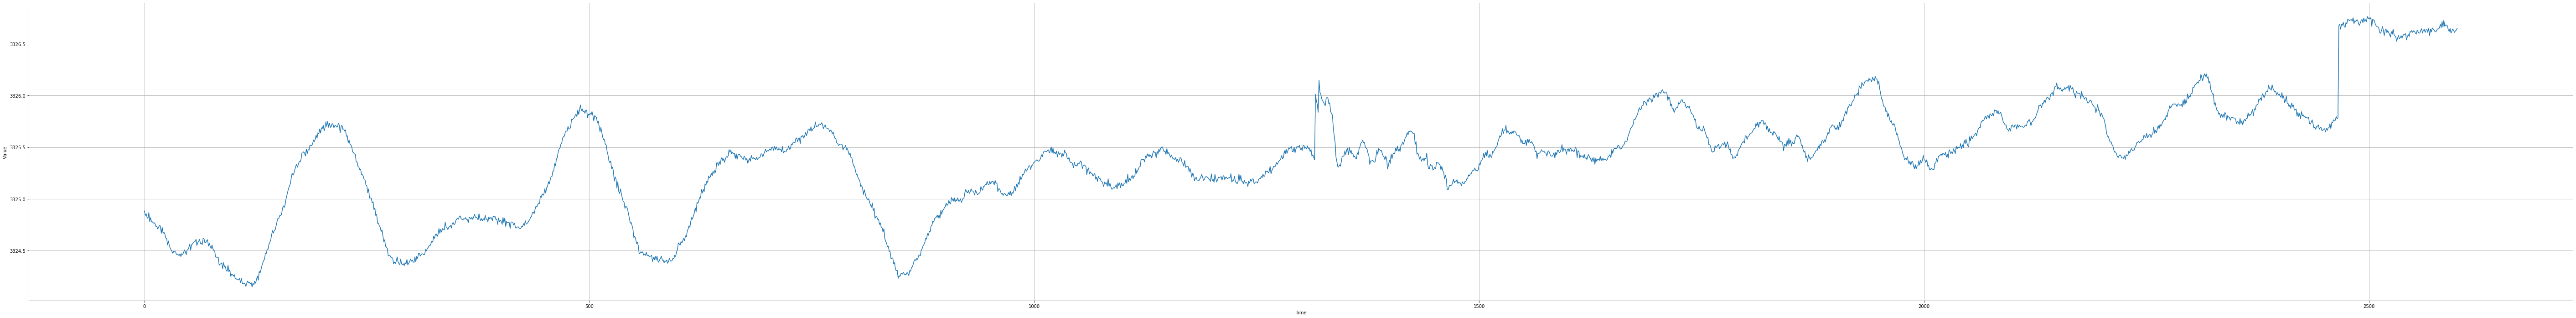

In [109]:
split_time =2600
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(100, 12))
plot_series(time_train, x_train)

window_size = 30
batch_size = 32
shuffle_buffer_size = 2600

In [110]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [133]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-9, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[ 0.28265128],
       [ 0.3989543 ],
       [-0.2925794 ],
       [-0.1942634 ],
       [ 0.33871093],
       [ 0.3226021 ],
       [-0.3496557 ],
       [-0.0221289 ],
       [-0.37774634],
       [ 0.22554277],
       [ 0.170603  ],
       [-0.09859487],
       [ 0.27317095],
       [ 0.33040935],
       [-0.00622581],
       [-0.24427015],
       [ 0.24260876],
       [ 0.263901  ],
       [-0.15552552],
       [-0.25029853],
       [-0.06692279],
       [ 0.04814094],
       [ 0.22741023],
       [ 0.33586258],
       [-0.03135148],
       [-0.2152836 ],
       [-0.12347925],
       [ 0.30743748],
       [-0.36154824],
       [ 0.02185841]], dtype=float32), array([-2.8384013e-06], dtype=float32)]


4110


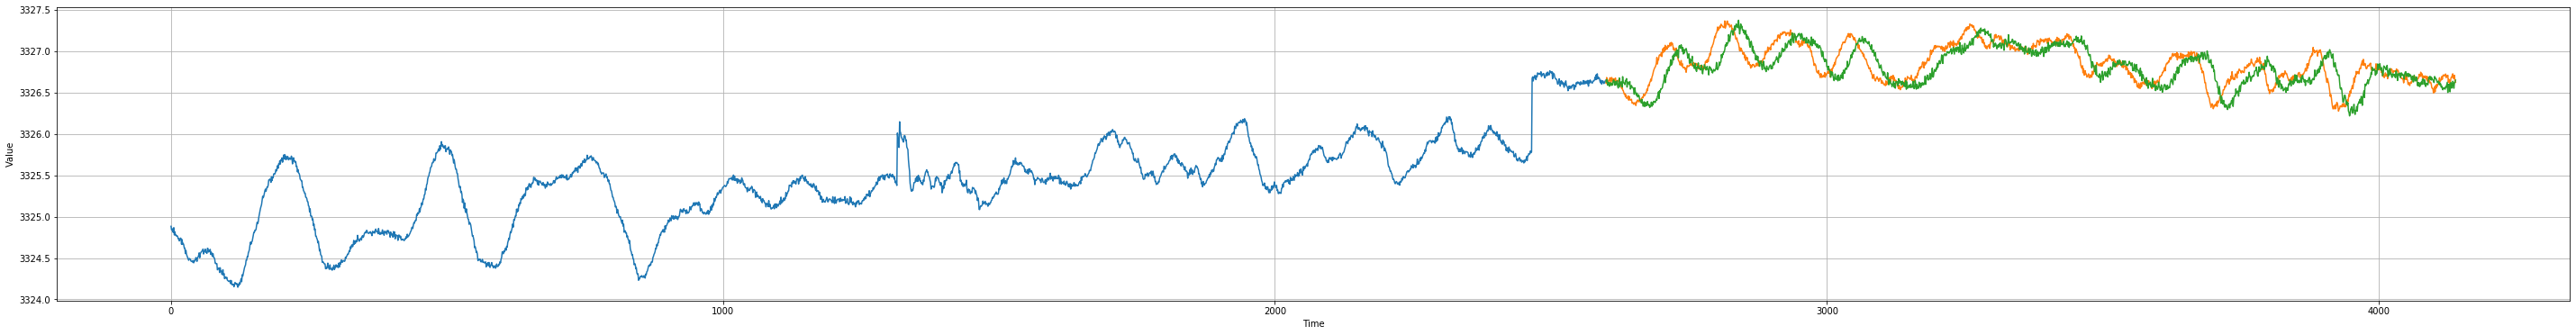

In [143]:
forecast = []
print(len(series) - window_size)

#forecast.append(model.predict(series[0:30][np.newaxis]))
#que=series[0:30].values[np.newaxis]
#print(que)
#que=model.predict(series[0:30][np.newaxis])
    
for a in range(len(series) - window_size):
 #   print(a)

    forecast.append(model.predict(series[a:a+ window_size].values[np.newaxis]))
    
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(50, 6))
plot_series(time_train, x_train)

plot_series(time_valid, x_valid)
plot_series(time_valid, results)



In [144]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

0.15374249

In [154]:
dataset2 = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model2.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-9, momentum=0.9))
model2.fit(dataset2,epochs=100,verbose=0)


4110


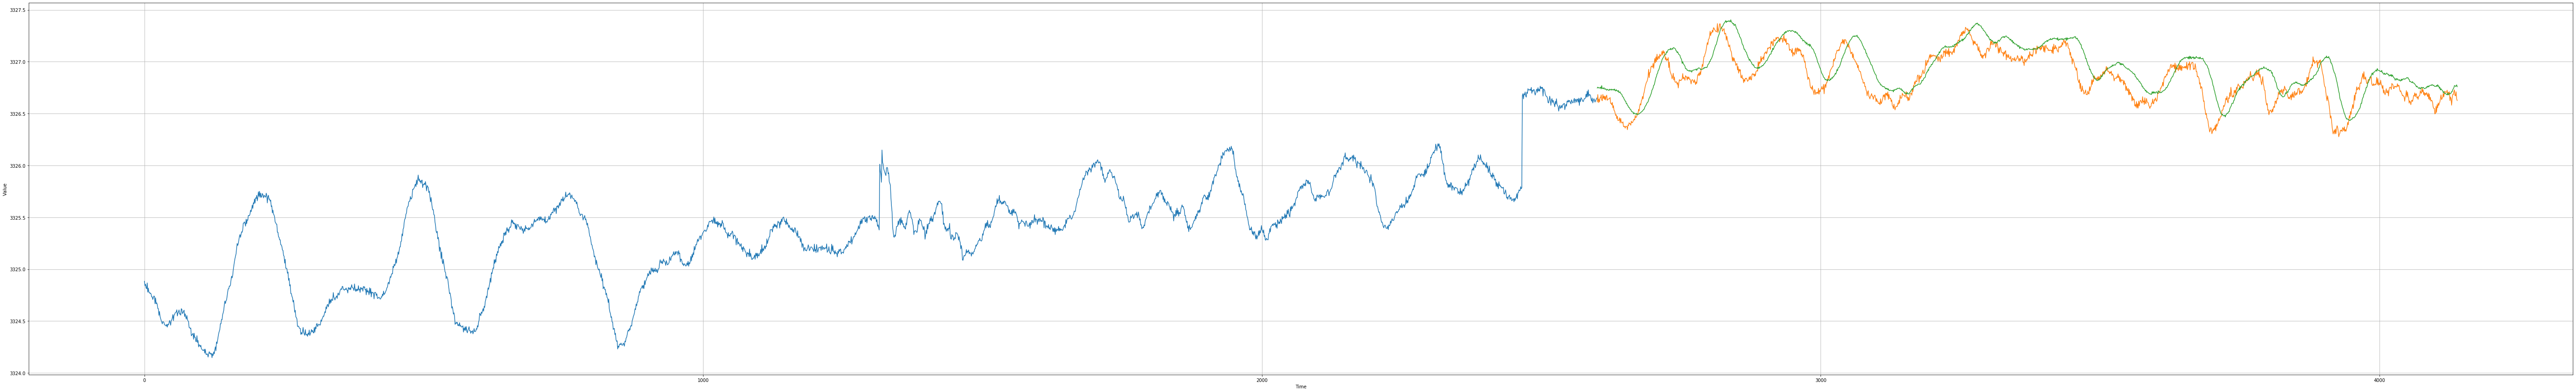

In [162]:
forecast = []
print(len(series) - window_size)

#forecast.append(model.predict(series[0:30][np.newaxis]))
#que=series[0:30].values[np.newaxis]
#print(que)
#que=model.predict(series[0:30][np.newaxis])
    
for a in range(len(series) - window_size):
 #   print(a)

    forecast.append(model2.predict(series[a:a+ window_size].values[np.newaxis]))
    
forecast = forecast[split_time-window_size:]
results2 = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(100, 15))
plot_series(time_train, x_train)

plot_series(time_valid, x_valid)
plot_series(time_valid, results2)


In [163]:
tf.keras.metrics.mean_absolute_error(x_valid, results2).numpy()

0.1405405

In [172]:
dataset3 = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-9 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-9, momentum=0.9)
model3.compile(loss="mse", optimizer=optimizer)
history = model3.fit(dataset3, epochs=100, callbacks=[lr_schedule], verbose=0)

[1e-09, 1e-07, 0, 30]

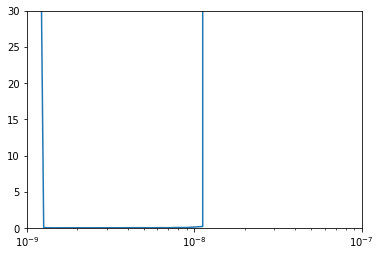

In [173]:
lrs = 1e-9 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-9, 1e-7, 0, 30])